In [118]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import plot_confusion_matrix, classification_report,ConfusionMatrixDisplay

In [2]:
# Import data, remove NaN
lego_frame_full_url = 'https://drive.google.com/uc?export=download&id=1ulvZVTxBcUIudWS9S9kq5pY0UARSZwaN'
lego_frame_full = pd.read_excel(lego_frame_full_url)
lego_frame_full.fillna(0, inplace=True)

# For this datathon we'll just focus on 15 of the most popular themes.
lego_frame = lego_frame_full[(lego_frame_full["Theme"] == "Technic") | 
                        (lego_frame_full["Theme"] == "Friends") |
                        (lego_frame_full["Theme"] == "City") |
                        (lego_frame_full["Theme"] == "Basic Set") |
                        (lego_frame_full["Theme"] == "Creator") |
                        (lego_frame_full["Theme"] == "Duplo") |
                        (lego_frame_full["Theme"] == "Star Wars") |
                        (lego_frame_full["Theme"] == "Ninjago") |
                        (lego_frame_full["Theme"] == "Construction") |
                        (lego_frame_full["Theme"] == "Airport") |
                        (lego_frame_full["Theme"] == "Police") |
                        (lego_frame_full["Theme"] == "Traffic") |
                        (lego_frame_full["Theme"] == "Bulk Bricks") |
                        (lego_frame_full["Theme"] == "Soccer") |
                        (lego_frame_full["Theme"] == "Batman")]

In [3]:
lego_frame.head()

,Set Num,Set Name,Theme,Year,Num Parts,[No Color],Aqua,Black,Blue,Blue-Violet,...,Trans-Very Lt Blue,Trans-Yellow,Unknown,Very Light Bluish Gray,Very Light Gray,Very Light Orange,Violet,White,Yellow,Yellowish Green
4,2823692,Simple and Motorized Machines Activity Pack,Technic,1997,24,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2818944,Structures Set,Technic,1997,439,20.0,0.0,116.0,56.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2814926,Technology Activity Set,Technic,1994,318,17.0,0.0,92.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
11,2815291,Teacher's Guide for Technology Group Activity Set,Technic,1994,16,16.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,951-2,Lego TC logo Starter Pack,Technic,1988,16,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
lego_frame.shape

(3011, 136)

In [5]:
country_data = pd.crosstab(index=lego_frame["Theme"], columns = 'count')
country_data.sort_values(by = "count")

col_0,count
Theme,
Batman,91
Soccer,97
Bulk Bricks,125
Traffic,151
Police,157
Airport,169
Construction,183
Ninjago,187
Star Wars,197


In [305]:
lego_data = lego_frame[lego_frame.columns[range(2,131)]]
lego_data.columns = lego_data.columns.str.replace(' ','')
lego_data = lego_data.drop(['Year', 'NumParts'],axis=1)
lego_datat = lego_data.transpose()
lego_datat = lego_datat.drop(["Theme"],axis=0)
lego_datat.head()

,4,8,10,11,12,13,15,20,21,22,...,10691,10693,10694,10698,10699,10700,10701,10704,10707,10712
[NoColor],24,20,17,16,13,12,11,10,10,10,...,0,0,0,0,0,0,0,0,0,0
Aqua,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Black,0,116,92,0,0,12,132,65,13,4,...,0,5,1,8,8,4,22,10,0,0
Blue,0,56,2,0,0,6,21,14,3,0,...,0,0,0,0,14,0,0,0,2,0
Blue-Violet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [306]:
lego_data = lego_data.drop(['Theme'],axis=1)
colors = lego_data.iloc[0,:]
colors
lego_datat = lego_datat.insert(colors, color)

TypeError: insert() missing 2 required positional arguments: 'column' and 'value'

In [275]:

for i in range(lego_colors.shape[1]):
    lm = smf.ols(formula='lego_colors.iloc[:,i] ~ Theme', data=lego_data).fit()

# print the coefficients
print(lm.params)
lm.summary()

Intercept               -2.245603e-15
Theme[T.Basic Set]       8.467742e-02
Theme[T.Batman]          4.395604e-02
Theme[T.Bulk Bricks]     2.015476e-15
Theme[T.City]            1.920447e-15
Theme[T.Construction]    3.127996e-15
Theme[T.Creator]         6.115932e-16
Theme[T.Duplo]           3.211009e-02
Theme[T.Friends]         9.090909e-02
Theme[T.Ninjago]         1.524064e+00
Theme[T.Police]          6.352121e-16
Theme[T.Soccer]          8.028667e-16
Theme[T.Star Wars]       1.629104e-15
Theme[T.Technic]         1.917083e-15
Theme[T.Traffic]         5.876444e-16
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     lego_colors.iloc[:, i]   R-squared:                       0.030
Model:                                OLS   Adj. R-squared:                  0.025
Method:                     Least Squares   F-statistic:                     6.585
Date:                    Sun, 13 Mar 2022   Prob (F-statistic):           2.47e-13
Time:                            23:33:17   Log-Likelihood:                -6474.7
No. Observations:                    3011   AIC:                         1.298e+04
Df Residuals:                        2996   BIC:                         1.307e+04
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -2.246e-15      0.160   -1.4e-14      1.000      -0.314       0.314
Theme[T.Basic Set]        0.0847      0.208      0.408      0.684      -0.323       0.492
Theme[T.Batman]           0.0440      0.271      0.162      0.871      -0.487       0.575
Theme[T.Bulk Bricks]   2.015e-15      0.246    8.2e-15      1.000      -0.482       0.482
Theme[T.City]           1.92e-15      0.206   9.32e-15      1.000      -0.404       0.404
Theme[T.Construction]  3.128e-15      0.222   1.41e-14      1.000      -0.436       0.436
Theme[T.Creator]       6.116e-16      0.209   2.93e-15      1.000      -0.409       0.409
Theme[T.Duplo]            0.0321      0.214      0.150      0.880      -0.387       0.451
Theme[T.Friends]          0.0909      0.205      0.443      0.658      -0.311       0.493
Theme[T.Ninjago]          1.5241      0.221      6.893      0.000       1.091       1.958
Theme[T.Police]        6.352e-16      0.231   2.75e-15      1.000      -0.453       0.453
Theme[T.Soccer]        8.029e-16      0.265   3.03e-15      1.000      -0.520       0.520
Theme[T.Star Wars]     1.629e-15      0.218   7.46e-15      1.000      -0.428       0.428
Theme[T.Technic]       1.917e-15      0.190   1.01e-14      1.000      -0.372       0.372
Theme[T.Traffic]       5.876e-16      0.233   2.52e-15      1.000      -0.457       0.457
==============================================================================
Omnibus:                     7690.618   Durbin-Watson:                   0.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        113092062.819
Skew:                          28.205   Prob(JB):                         0.00
Kurtosis:                     950.760   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [228]:
lego_data.shape

(127, 3011)

In [6]:
# Creates a copy of the dataframe where color counts are normalized 
#  so each gives the % of parts in the set with that color, rather than the total count.
norm_lego = lego_frame.copy()
norm_lego = norm_lego.drop([ 'Set Name', 'Set Num', 'Theme', 'Year', 'Num Parts'], axis=1)
norm_lego = norm_lego.div(norm_lego.sum(axis=1), axis=0)

# A list of all the color name columns
color_cols = norm_lego.columns
# A list of all the other numeric columns
other_cols = ["Year", "Num Parts"]

# Add back the non-numeric columns to the normalized table
norm_lego["Year"] = lego_frame["Year"]
norm_lego["Set Name"] = lego_frame["Set Name"]
norm_lego["Set Num"] = lego_frame["Set Num"]
norm_lego["Theme"] = lego_frame["Theme"]
norm_lego["Num Parts"] = lego_frame["Num Parts"]
norm_lego.head(3)

,[No Color],Aqua,Black,Blue,Blue-Violet,Bright Green,Bright Light Blue,Bright Light Orange,Bright Light Yellow,Bright Pink,...,Very Light Orange,Violet,White,Yellow,Yellowish Green,Year,Set Name,Set Num,Theme,Num Parts
4,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,1997,Simple and Motorized Machines Activity Pack,2823692,Technic,24
8,0.045558,0.0,0.264237,0.127563,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,1997,Structures Set,2818944,Technic,439
10,0.051360,0.0,0.277946,0.006042,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.006042,0.003021,0.0,1994,Technology Activity Set,2814926,Technic,318


In [7]:
# Creates a copy of the dataframe where color counts are normalized 
#  so each gives the % of parts in the set with that color, rather than the total count.
norm_lego = lego_frame.copy()
norm_lego = norm_lego.drop([ 'Set Name', 'Set Num', 'Theme', 'Year', 'Num Parts'], axis=1)
norm_lego = norm_lego.div(norm_lego.sum(axis=1), axis=0)

# A list of all the color name columns
color_cols = norm_lego.columns
# A list of all the other numeric columns
other_cols = ["Year", "Num Parts"]

# Add back the non-numeric columns to the normalized table
norm_lego["Year"] = lego_frame["Year"]
norm_lego["Set Name"] = lego_frame["Set Name"]
norm_lego["Set Num"] = lego_frame["Set Num"]
norm_lego["Theme"] = lego_frame["Theme"]
norm_lego["Num Parts"] = lego_frame["Num Parts"]
norm_lego.head(3)

,[No Color],Aqua,Black,Blue,Blue-Violet,Bright Green,Bright Light Blue,Bright Light Orange,Bright Light Yellow,Bright Pink,...,Very Light Orange,Violet,White,Yellow,Yellowish Green,Year,Set Name,Set Num,Theme,Num Parts
4,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,1997,Simple and Motorized Machines Activity Pack,2823692,Technic,24
8,0.045558,0.0,0.264237,0.127563,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,1997,Structures Set,2818944,Technic,439
10,0.051360,0.0,0.277946,0.006042,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.006042,0.003021,0.0,1994,Technology Activity Set,2814926,Technic,318


In [9]:
#the complete list of color columns 
color_cols

Index(['[No Color]', 'Aqua', 'Black', 'Blue', 'Blue-Violet', 'Bright Green',
       'Bright Light Blue', 'Bright Light Orange', 'Bright Light Yellow',
       'Bright Pink',
       ...
       'Trans-Very Lt Blue', 'Trans-Yellow', 'Unknown',
       'Very Light Bluish Gray', 'Very Light Gray', 'Very Light Orange',
       'Violet', 'White', 'Yellow', 'Yellowish Green'],
      dtype='object', length=131)

In [10]:
# Generate test and training sets
from sklearn.model_selection import train_test_split
#below are x_train, x_test, y_train and y_test
f_train, f_test, l_train, l_test = train_test_split(norm_lego[color_cols],norm_lego['Theme'], test_size=0.4)#40% test

# TODO: Make sure you split your data into training and test sets before you start training classifiers.

In [11]:
f_train

,[No Color],Aqua,Black,Blue,Blue-Violet,Bright Green,Bright Light Blue,Bright Light Orange,Bright Light Yellow,Bright Pink,...,Trans-Very Lt Blue,Trans-Yellow,Unknown,Very Light Bluish Gray,Very Light Gray,Very Light Orange,Violet,White,Yellow,Yellowish Green
1184,0.003636,0.0,0.392727,0.043636,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007273,0.040000,0.0
10672,0.000000,0.0,0.136364,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3933,0.000000,0.0,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,0.0
5357,0.000000,0.0,0.666667,0.022222,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.288889,0.0
8271,0.000000,0.0,0.237838,0.059459,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108108,0.129730,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4246,0.000000,0.0,0.058824,0.352941,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176471,0.235294,0.0
7347,0.000000,0.0,0.206349,0.161905,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003175,0.092063,0.0
9580,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
7496,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [12]:
f_train.shape

(1806, 131)

In [14]:
f_test

,[No Color],Aqua,Black,Blue,Blue-Violet,Bright Green,Bright Light Blue,Bright Light Orange,Bright Light Yellow,Bright Pink,...,Trans-Very Lt Blue,Trans-Yellow,Unknown,Very Light Bluish Gray,Very Light Gray,Very Light Orange,Violet,White,Yellow,Yellowish Green
5220,0.000000,0.0,0.260000,0.020000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.040000,0.0,0.0,0.0,0.0,0.0,0.120000,0.220000,0.0
4712,0.000000,0.0,0.102564,0.000000,0.0,0.051282,0.0,0.102564,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.076923,0.051282,0.0
4503,0.000000,0.0,0.086957,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
5342,0.000000,0.0,0.477273,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.386364,0.022727,0.0
930,0.001709,0.0,0.135043,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.005128,0.0,0.0,0.0,0.0,0.0,0.162393,0.003419,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4255,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
7717,0.000000,0.0,0.000000,0.133333,0.0,0.133333,0.0,0.066667,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.066667,0.033333,0.0
914,0.010870,0.0,0.467391,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.250000,0.010870,0.0
68,0.192308,0.0,0.192308,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.076923,0.038462,0.0


In [15]:
#lets make this decision tree!
from sklearn.tree import DecisionTreeClassifier

In [400]:
#create classifier
dt_clf = DecisionTreeClassifier()
#train classifier
dt_clf = dt_clf.fit(f_train, l_train)
#now predict the response for test dataset
dt_pred = dt_clf.predict(f_test) 

In [401]:
#evaluate Accuracy
print("Accuracy: ", skm.accuracy_score(y_true=l_test,y_pred=dt_pred))

Accuracy:  0.5643153526970954


In [402]:
# Precision: TP / Predicted positive  true positive over predicted positive so 57% of the positive labels were correct
skm.precision_score(y_true=l_test, y_pred=dt_pred, average='weighted')

0.5644554320311335

In [403]:
# Recall: TP / Real positive so how many of the real positives were labelled
skm.recall_score(y_true=l_test, y_pred=dt_pred, average='weighted')

0.5643153526970954

In [404]:
# F1 Score - F1 Measure: weighted average of precision and recall: F1 = 2 * (Recall * Precision)/(Recall + Precision)
skm.f1_score(y_true=l_test, y_pred=dt_pred, average='weighted')

0.5631091410837173

In [405]:
#we'll have to do a lot tunning for this accuracy to improve this
#let's graph first
import graphviz 
from sklearn import tree
#tree.plot_tree(dt_clf)

dot_data = tree.export_graphviz(dt_clf, out_file=None) 
graph = graphviz.Source(dot_data) 
 

In [406]:
graph_data = sk.tree.export_graphviz(dt_clf, out_file=None,
                         feature_names=color_cols,  
                         class_names=dt_clf.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(graph_data) 
graph

# Or save out to a file using this command:
# graph.render("decision_tree") 

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [407]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names =norm_lego[color_cols],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [408]:
#confusion matrix 
dt_clf_cfmat = skm.confusion_matrix(y_true=l_test,y_pred=dt_pred, normalize='true')
dt_clf_cfmat

array([[0.5       , 0.03125   , 0.        , 0.        , 0.03125   ,
        0.0625    , 0.109375  , 0.046875  , 0.        , 0.        ,
        0.015625  , 0.046875  , 0.015625  , 0.0625    , 0.078125  ],
       [0.02150538, 0.76344086, 0.        , 0.01075269, 0.01075269,
        0.04301075, 0.05376344, 0.06451613, 0.03225806, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.23684211, 0.02631579, 0.10526316,
        0.05263158, 0.07894737, 0.        , 0.13157895, 0.05263158,
        0.        , 0.        , 0.18421053, 0.07894737, 0.05263158],
       [0.04761905, 0.02380952, 0.        , 0.5952381 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02380952, 0.30952381, 0.        ],
       [0.03738318, 0.02803738, 0.03738318, 0.01869159, 0.37383178,
        0.00934579, 0.1588785 , 0.02803738, 0.03738318, 0.        ,
        0.01869159, 0.03738318, 0.09345794, 

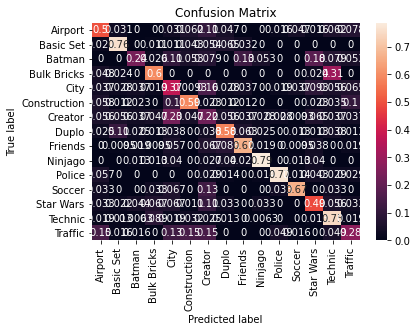

<Figure size 432x288 with 0 Axes>

In [409]:
cfmat = sns.heatmap(dt_clf_cfmat,xticklabels=dt_clf.classes_,yticklabels=dt_clf.classes_,annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.figure()
plt.savefig('output.png')

In [410]:
plt.figure()
plt.savefig('output.png')

<Figure size 432x288 with 0 Axes>

In [411]:
figure = cfmat.get_figure()
figure.savefig('cfmat.png', dpi=400)

In [412]:
print(classification_report(l_test,dt_pred,labels=lego_frame["Theme"].unique(),target_names = lego_frame["Theme"].unique()))

              precision    recall  f1-score   support

     Technic       0.72      0.75      0.73       158
     Ninjago       0.81      0.79      0.80        75
      Police       0.84      0.77      0.81        70
       Duplo       0.55      0.58      0.57        79
   Basic Set       0.72      0.76      0.74        93
     Traffic       0.31      0.28      0.29        61
     Creator       0.24      0.22      0.23       107
     Airport       0.44      0.50      0.47        64
   Star Wars       0.52      0.49      0.50        90
      Soccer       0.61      0.67      0.63        30
     Friends       0.74      0.67      0.70       105
        City       0.36      0.37      0.37       107
      Batman       0.30      0.24      0.26        38
Construction       0.62      0.59      0.61        86
 Bulk Bricks       0.43      0.60      0.50        42

    accuracy                           0.56      1205
   macro avg       0.55      0.55      0.55      1205
weighted avg       0.56   

In [ ]:
_ = pd.plotting.scatter_matrix(lego_colors, figsize=(15,15))

Intercept               -6.740010e-18
Theme[T.Basic Set]       1.300708e-04
Theme[T.Batman]          2.711662e-05
Theme[T.Bulk Bricks]     7.054618e-18
Theme[T.City]            5.538054e-18
Theme[T.Construction]    8.673948e-18
Theme[T.Creator]         1.985114e-18
Theme[T.Duplo]           1.143551e-03
Theme[T.Friends]         9.336624e-04
Theme[T.Ninjago]         4.025561e-03
Theme[T.Police]          2.044303e-18
Theme[T.Soccer]          2.850477e-18
Theme[T.Star Wars]       4.573583e-18
Theme[T.Technic]         6.826358e-18
Theme[T.Traffic]         1.700366e-18
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     norm_lego.iloc[:, i]   R-squared:                       0.020
Model:                              OLS   Adj. R-squared:                  0.015
Method:                   Least Squares   F-statistic:                     4.269
Date:                  Sun, 13 Mar 2022   Prob (F-statistic):           1.56e-07
Time:                          22:37:08   Log-Likelihood:                 10637.
No. Observations:                  3011   AIC:                        -2.124e+04
Df Residuals:                      2996   BIC:                        -2.115e+04
Df Model:                            14                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -6.74e-18      0.001  -1.24e-14      1.000      -0.001       0.001
Theme[T.Basic Set]        0.0001      0.001      0.184      0.854      -0.001       0.002
Theme[T.Batman]        2.712e-05      0.001      0.029      0.977      -0.002       0.002
Theme[T.Bulk Bricks]   7.055e-18      0.001   8.44e-15      1.000      -0.002       0.002
Theme[T.City]          5.538e-18      0.001    7.9e-15      1.000      -0.001       0.001
Theme[T.Construction]  8.674e-18      0.001   1.15e-14      1.000      -0.001       0.001
Theme[T.Creator]       1.985e-18      0.001   2.79e-15      1.000      -0.001       0.001
Theme[T.Duplo]            0.0011      0.001      1.574      0.116      -0.000       0.003
Theme[T.Friends]          0.0009      0.001      1.337      0.181      -0.000       0.002
Theme[T.Ninjago]          0.0040      0.001      5.351      0.000       0.003       0.006
Theme[T.Police]        2.044e-18      0.001    2.6e-15      1.000      -0.002       0.002
Theme[T.Soccer]         2.85e-18      0.001   3.16e-15      1.000      -0.002       0.002
Theme[T.Star Wars]     4.574e-18      0.001   6.15e-15      1.000      -0.001       0.001
Theme[T.Technic]       6.826e-18      0.001   1.06e-14      1.000      -0.001       0.001
Theme[T.Traffic]         1.7e-18      0.001   2.14e-15      1.000      -0.002       0.002
==============================================================================
Omnibus:                     7471.429   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         95073273.561
Skew:                          26.221   Prob(JB):                         0.00
Kurtosis:                     871.940   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [383]:
#hyperparameter tunning
dt_clf2 = DecisionTreeClassifier()
#train classifier
dt_clf2 = dt_clf.fit(f_train, l_train)
#now predict the response for test dataset
dt_pred2 = dt_clf.predict(f_test) 

In [384]:
#print scores
print("Accuracy: ", skm.accuracy_score(y_true=l_test,y_pred=dt_pred2))
#skm.precision_score(y_true=l_test, y_pred=dt_pred, average='weighted')
#skm.f1_score(y_true=l_test, y_pred=dt_pred, average='weighted')
#skm.recall_score(y_true=l_test, y_pred=dt_pred, average='weighted')

Accuracy:  0.5618257261410788


In [385]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [386]:
grid_search = GridSearchCV(estimator=dt_clf2, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [387]:
grid_search.fit(f_train, l_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   13.7s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [388]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035494,0.004667,0.010894,0.001450,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.190265,0.194690,0.181818,0.177384,0.186039,0.006809,50
1,0.042576,0.009494,0.012179,0.001816,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.192478,0.194690,0.181818,0.177384,0.186592,0.007208,47
2,0.031316,0.002107,0.009442,0.002798,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.192478,0.194690,0.181818,0.177384,0.186592,0.007208,47
3,0.028317,0.001501,0.010239,0.000909,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.192478,0.194690,0.181818,0.177384,0.186592,0.007208,47
4,0.028441,0.000569,0.010473,0.001326,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.201327,0.181416,0.175166,0.192905,0.187704,0.010117,46


In [389]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
20,0.075675,0.002282,0.010326,0.000581,gini,20,5,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.542035,0.535398,0.527716,0.483370,0.522130,0.022944,1
21,0.084256,0.021414,0.011940,0.002956,gini,20,10,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.500000,0.517699,0.503326,0.485588,0.501653,0.011414,2
22,0.062332,0.004509,0.017883,0.009446,gini,20,20,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.497788,0.526549,0.487805,0.487805,0.499987,0.015868,3
17,0.065172,0.008268,0.017094,0.008536,gini,10,20,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.488938,0.513274,0.490022,0.474501,0.491684,0.013890,4
16,0.093963,0.049366,0.011646,0.001796,gini,10,10,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.480088,0.511062,0.478936,0.478936,0.487255,0.013753,5


In [390]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

In [391]:
dt_best = grid_search.best_estimator_

In [392]:
from sklearn.metrics import confusion_matrix, accuracy_score
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(l_train, dt_classifier.predict(f_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(l_train, dt_classifier.predict(f_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(l_test, dt_classifier.predict(f_test)))
    print("Test Confusion Matrix:")
    cmatrix = confusion_matrix(l_test, dt_classifier.predict(f_test))
    print(confusion_matrix(l_test, dt_classifier.predict(f_test)))
evaluate_model(dt_best)

Train Accuracy : 0.7253599114064231
Train Confusion Matrix:
[[ 78   3   0   0   4   1   5   1   0   0   3   0   0   6   4]
 [  5 129   0   0   3   3   5   4   1   0   0   3   0   2   0]
 [  2   0  30   0   4   2   4   3   1   1   1   1   2   2   0]
 [  0   2   0  43   1   0   0   0   0   0   0   0   0  37   0]
 [  4   2   3   0 116   2   5   4   0   1   4   5   1   2   2]
 [  4   1   3   0   4  80   1   0   0   0   0   0   0   4   0]
 [ 10   1   3   2  32   5  59   4   5   1   3   3   2   4   1]
 [  1  10   0   4   6   1   1 109   6   0   0   1   0   0   0]
 [  1   0   1   1   8   0   1  10 127   1   0   3   1   5   0]
 [  0   0   3   0   7   2   4   1   0  94   0   0   1   0   0]
 [  3   0   0   0   2   2   3   1   0   0  73   1   0   2   0]
 [  2   1   0   3   8   2   0   0   2   2   0  44   1   2   0]
 [  2   2   4   1  17   1   6   0   2   2   1   0  58  11   0]
 [  8   0   0  16   3   5   2   0   1   0   2   0   1 227   1]
 [  6   0   0   0  10  12   5   1   2   0   1   4   2   4 

In [393]:
get_dt_graph(dt_best)

NameError: name 'get_dt_graph' is not defined

Text(0.5, 1.0, 'Test Confusion Matrix (%)')

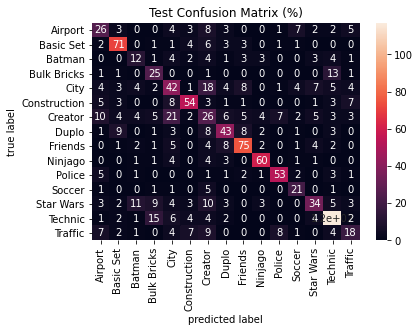

In [394]:
cmatrix = confusion_matrix(l_test, dt_clf.predict(f_test))
sns.heatmap(cmatrix, 
            xticklabels=dt_clf.classes_,
            yticklabels=dt_clf.classes_,
            annot=True)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Test Confusion Matrix (%)')

Text(0.5, 1.0, 'Train Confusion Matrix (%)')

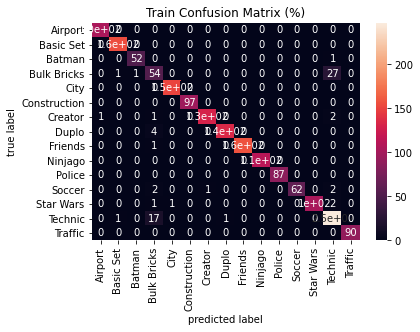

In [397]:
train_cmat = confusion_matrix(l_train, dt_clf.predict(f_train))
sns.heatmap(train_cmat, 
            xticklabels=dt_clf.classes_,
            yticklabels=dt_clf.classes_,
            annot=True)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Train Confusion Matrix (%)')

In [398]:
print(classification_report(l_test,dt_pred2,labels=lego_frame["Theme"].unique(),target_names = lego_frame["Theme"].unique()))

              precision    recall  f1-score   support

     Technic       0.71      0.74      0.72       158
     Ninjago       0.80      0.80      0.80        75
      Police       0.75      0.76      0.75        70
       Duplo       0.55      0.54      0.55        79
   Basic Set       0.70      0.76      0.73        93
     Traffic       0.40      0.30      0.34        61
     Creator       0.23      0.24      0.24       107
     Airport       0.39      0.41      0.40        64
   Star Wars       0.56      0.38      0.45        90
      Soccer       0.51      0.70      0.59        30
     Friends       0.71      0.71      0.71       105
        City       0.39      0.39      0.39       107
      Batman       0.32      0.32      0.32        38
Construction       0.68      0.63      0.65        86
 Bulk Bricks       0.40      0.60      0.48        42

    accuracy                           0.56      1205
   macro avg       0.54      0.55      0.54      1205
weighted avg       0.56   

In [399]:
print(classification_report(l_test, dt_best.predict(f_test)))

              precision    recall  f1-score   support

     Airport       0.35      0.44      0.39        64
   Basic Set       0.67      0.69      0.68        93
      Batman       0.41      0.29      0.34        38
 Bulk Bricks       0.41      0.38      0.40        42
        City       0.31      0.48      0.38       107
Construction       0.56      0.52      0.54        86
     Creator       0.30      0.23      0.26       107
       Duplo       0.53      0.56      0.54        79
     Friends       0.71      0.66      0.68       105
     Ninjago       0.82      0.81      0.82        75
      Police       0.72      0.69      0.70        70
      Soccer       0.53      0.63      0.58        30
   Star Wars       0.65      0.39      0.49        90
     Technic       0.62      0.76      0.68       158
     Traffic       0.43      0.21      0.29        61

    accuracy                           0.54      1205
   macro avg       0.53      0.52      0.52      1205
weighted avg       0.55   

In [82]:
#parameter tuning - this didn't work
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
std_slc = StandardScaler()
pca = decomposition.PCA()
color_cols

Index(['[No Color]', 'Aqua', 'Black', 'Blue', 'Blue-Violet', 'Bright Green',
       'Bright Light Blue', 'Bright Light Orange', 'Bright Light Yellow',
       'Bright Pink',
       ...
       'Trans-Very Lt Blue', 'Trans-Yellow', 'Unknown',
       'Very Light Bluish Gray', 'Very Light Gray', 'Very Light Orange',
       'Violet', 'White', 'Yellow', 'Yellowish Green'],
      dtype='object', length=131)

In [95]:
pipe = Pipeline(steps=[('std_slc', std_slc), 
                      ('pca', pca), 
                      ('dt_clf', dt_clf)])
#now define the parameters we want to optimize for these three objects 
#StandardScaler doesnot requires any parameters to be optimised by GridSearchCV.
#Principal Component Analysis requires a parameter 'n_components' to be optimised. 
#'n_components' signifies the number of components to keep after reducing the dimension.
n_components = list(range(1,f_train.shape[1]+1,1))

In [94]:
f_train.shape[1]

131

In [83]:
#DecisionTreeClassifier requires two parameters 'criterion' and 'max_depth' to be optimised by GridSearchCV. 
#So we have set these two parameters as a list of values form which GridSearchCV will select the best value of parameter.
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]


In [84]:
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

In [98]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(norm_lego[color_cols].values, l_train) #maybe try f_train and l_train norm_lego[color_cols], norm_lego['Theme']

ValueError: Invalid parameter dec_tree for estimator Pipeline(steps=[('std_slc', StandardScaler()), ('pca', PCA()),
                ('dt_clf', DecisionTreeClassifier())]). Check the list of available parameters with `estimator.get_params().keys()`.

In [103]:
norm_lego['Theme']

4          Technic
8          Technic
10         Technic
11         Technic
12         Technic
           ...    
10700      Ninjago
10701      Ninjago
10704    Star Wars
10707    Basic Set
10712      Friends
Name: Theme, Length: 3011, dtype: object

In [63]:
from sklearn import decomposition, datasets
dataset = datasets.load_wine()
X = dataset.data
print(X)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [80]:
color_cols

Index(['[No Color]', 'Aqua', 'Black', 'Blue', 'Blue-Violet', 'Bright Green',
       'Bright Light Blue', 'Bright Light Orange', 'Bright Light Yellow',
       'Bright Pink',
       ...
       'Trans-Very Lt Blue', 'Trans-Yellow', 'Unknown',
       'Very Light Bluish Gray', 'Very Light Gray', 'Very Light Orange',
       'Violet', 'White', 'Yellow', 'Yellowish Green'],
      dtype='object', length=131)

In [92]:
#178 rows and 13 cols
X.shape

(178, 13)

In [91]:
y = dataset.target
y.shape

(178,)